In [16]:
from tensorflow.python.client import device_lib
import tensorflow as tf
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5485545821317872563
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6764586599
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2465288877563383004
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [17]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

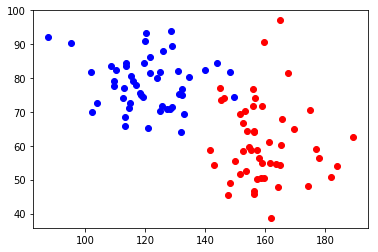

In [18]:
import numpy as np
from bilderGenerator import zieheBilder
import matplotlib.pyplot as plt
test = zieheBilder(50)
train = zieheBilder(500)
%matplotlib inline
plt.close('all')
colors = ['red','blue','red']
for i in range(len(test[0])):
    plt.plot(test[0][i], test[1][i],'ro', color= colors[test[2][i]])

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

from keras.utils import np_utils
from keras.optimizers import SGD

import numpy as np
np.random.seed(123) #um die Gewichte immer gleich zufaellig zu initialisieren
from tensorflow import set_random_seed
set_random_seed(123) # um die Gewichte immer gleichzufaellig zu initialisieren

In [20]:
X_train = np.dstack(train[:2])[0]#X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = np.dstack(test[:2])[0]#X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Y_train = np_utils.to_categorical(train[2]==1,2)
Y_test = np_utils.to_categorical(test[2]==1,2)
X_train = X_train.reshape(X_train.shape[0], 2, 1)
X_test = X_test.reshape(X_test.shape[0], 2, 1) 

In [21]:
from keras.callbacks import TensorBoard

In [22]:
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)

In [23]:
model = Sequential() 
 
model.add(Flatten(input_shape=(2,1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=['accuracy'])
 
history = model.fit(X_train, Y_train, 
          batch_size=32, epochs=100, validation_split=0.2,verbose=1, callbacks=[tensorboard])
 
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n', 'test acc', score[1])

print(history.history)

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 186us/step - loss: 0.7634 - acc: 0.7100 - val_loss: 0.3683 - val_acc: 0.8750
Epoch 2/100
800/800 [==============================] - 0s 62us/step - loss: 0.5351 - acc: 0.7937 - val_loss: 0.2509 - val_acc: 0.9200
Epoch 3/100
800/800 [==============================] - 0s 60us/step - loss: 0.3239 - acc: 0.8862 - val_loss: 0.2519 - val_acc: 0.9450
Epoch 4/100
800/800 [==============================] - 0s 61us/step - loss: 0.1753 - acc: 0.9350 - val_loss: 0.2555 - val_acc: 0.9200
Epoch 5/100
800/800 [==============================] - 0s 61us/step - loss: 0.1201 - acc: 0.9550 - val_loss: 0.1484 - val_acc: 0.9500
Epoch 6/100
800/800 [==============================] - 0s 60us/step - loss: 0.0985 - acc: 0.9612 - val_loss: 0.2408 - val_acc: 0.9200
Epoch 7/100
800/800 [==============================] - 0s 61us/step - loss: 0.1203 - acc: 0.9563 - val_loss: 0.1694 - val_acc: 0.9200
Epoch 8/100
800